## Problem Statement

This tutorial takes a practical and coding-focused. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


In [34]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [36]:
from urllib.request import urlretrieve

In [38]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x13d1cddf0>)

In [40]:
import pandas as pd

In [44]:
df = pd.read_csv('medical.csv')

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [52]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [64]:
import plotly.express as px  #interactive charts
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline        
#avoid popups of charts

In [78]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [80]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

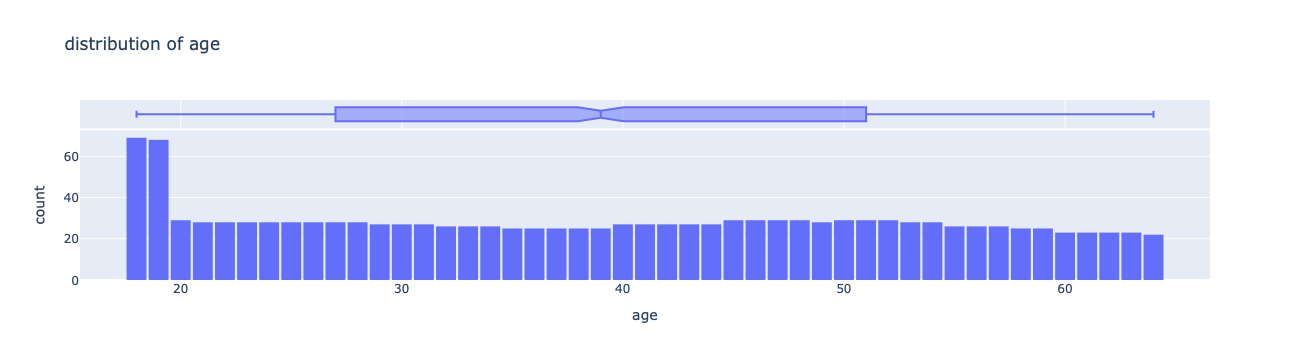

In [84]:
fig = px.histogram(df,
            x='age',
            marginal = 'box',
            nbins = 47,
            title='distribution of age')
fig. update_layout (bargap=0.1)
fig.show()

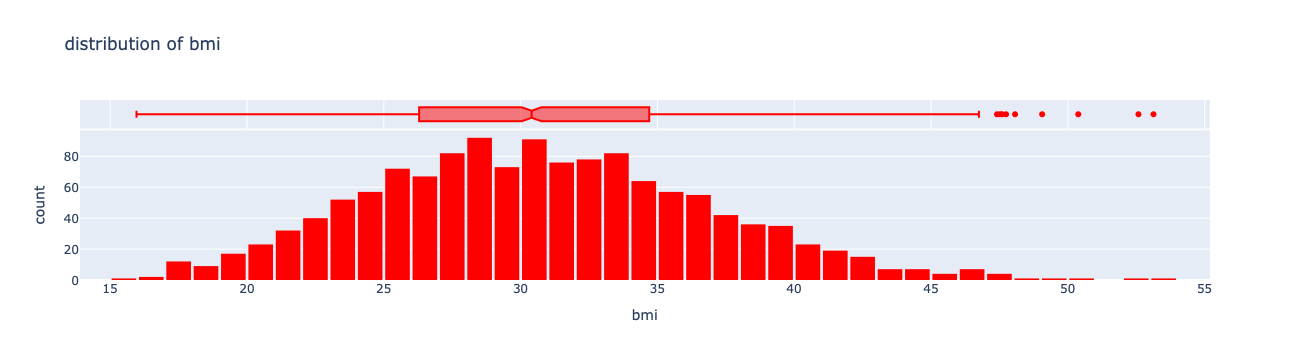

In [90]:
fig = px.histogram(df,
                  x= 'bmi',
                  marginal= 'box',
                  nbins=47,
                  color_discrete_sequence=['red'],
                  title='distribution of bmi')
fig.update_layout (bargap=0.1)
fig.show()

#depicts gaussian distribution

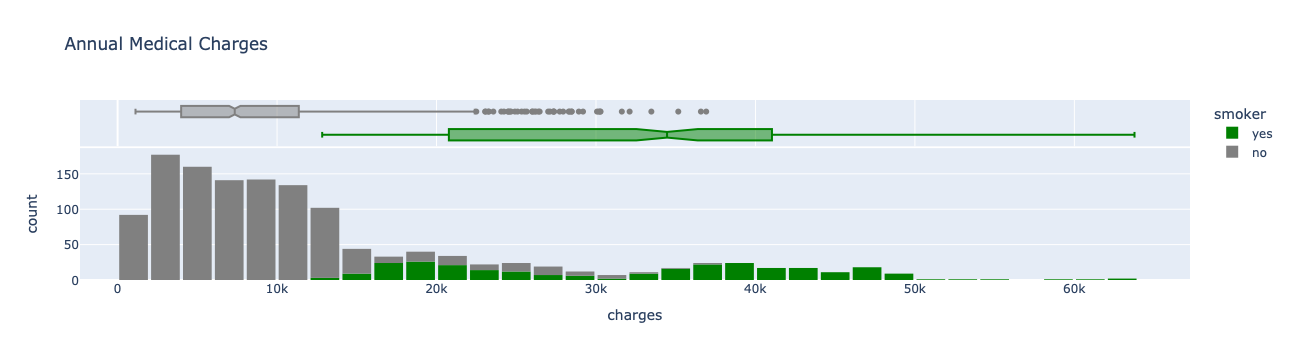

In [94]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

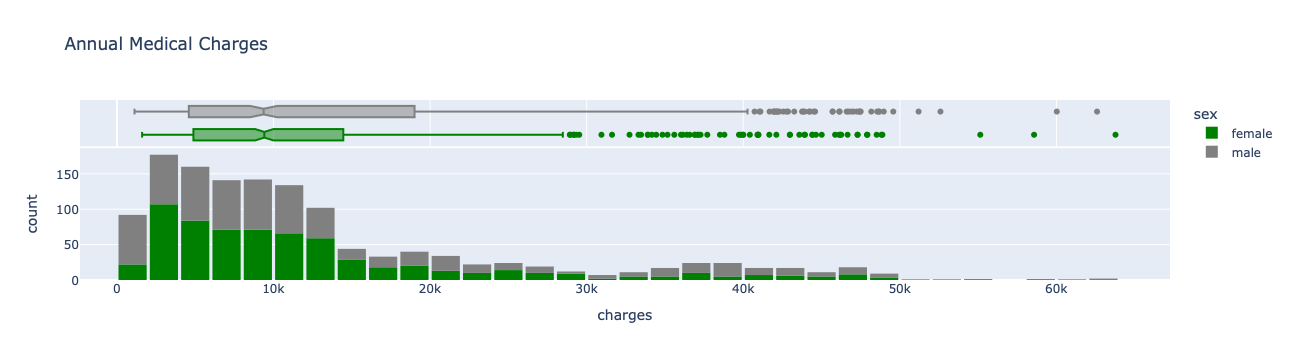

In [96]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

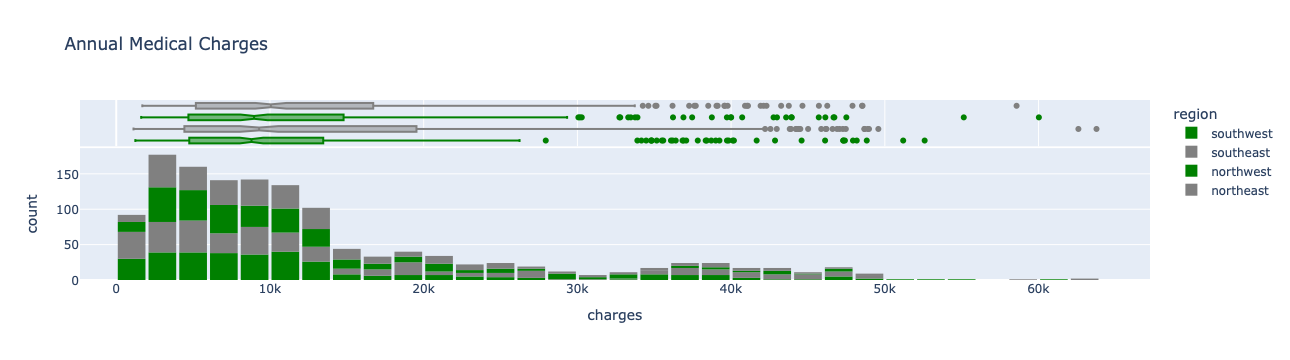

In [98]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [104]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

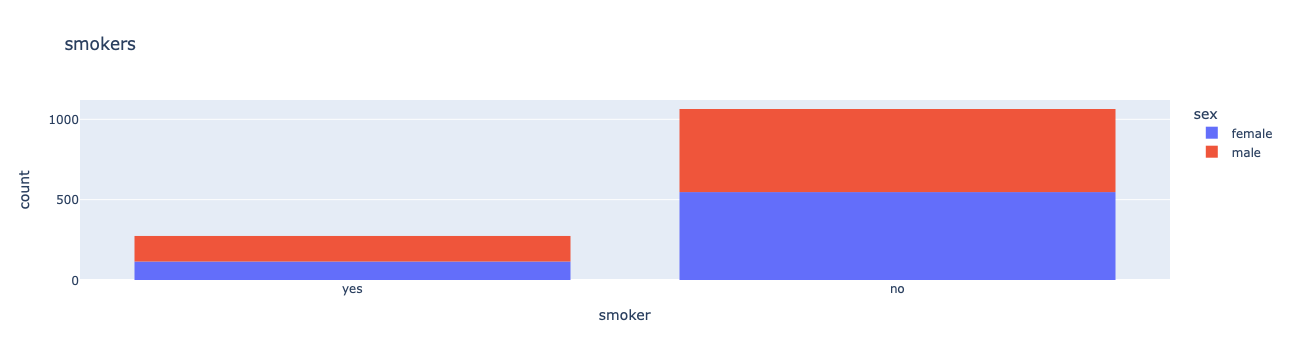

In [106]:
px.histogram(df,
            x= 'smoker',
            color = 'sex',
            title= 'smokers')

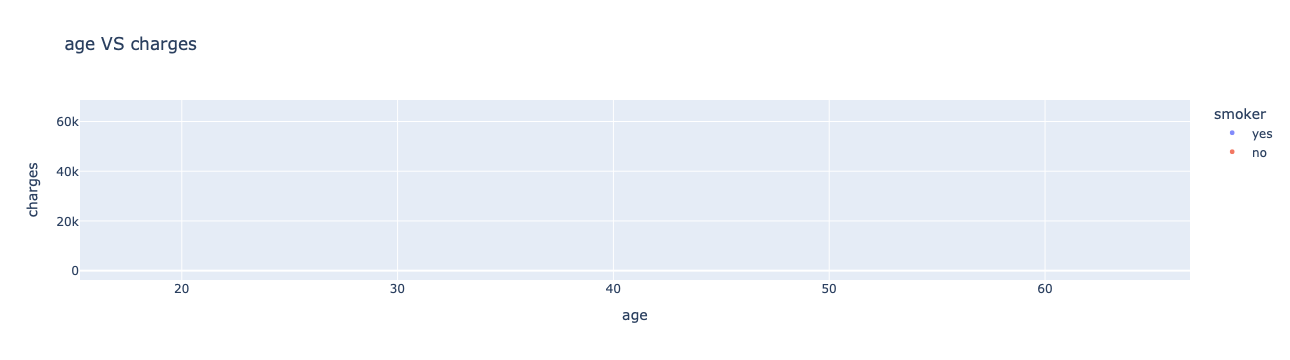

In [117]:
 fig = px.scatter(df,
                 x='age',
                 y= 'charges',
                 color= 'smoker',
                 opacity =0.8,
                  hover_data = ['sex'],
                 title= 'age VS charges')
fig.update_traces(marker_size=5)
fig.show()

**Analysis from above plots**

From the scatter plot, we observe a positive relationship between age and medical charges,
with significant variance across all age groups.

Smoking status introduces a strong separation in costs: smokers incur substantially higher
charges than non-smokers across all ages.

The data suggests the presence of multiple cost regimes driven primarily by smoking status,
with age acting as a secondary contributing factor. This indicates an interaction effect
between age and smoking rather than a simple linear relationship.


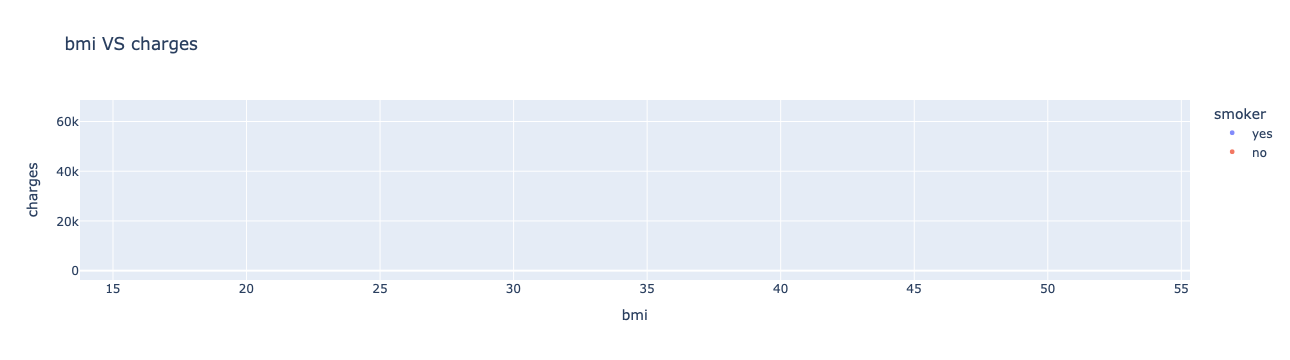

In [127]:
 fig = px.scatter(df,
                 x='bmi',
                 y= 'charges',
                 color= 'smoker',
                 opacity =0.8,
                  hover_data = ['sex'],
                 title= 'bmi VS charges')
fig.update_traces(marker_size=5)
fig.show()

From the plot, BMI alone shows a weak relationship with medical charges for non-smokers,
as costs remain relatively low across BMI values.

However, for smokers, charges increase significantly with BMI, particularly beyond BMI ≈ 30.
This suggests a strong interaction effect between BMI and smoking status, where higher BMI
amplifies medical costs primarily for smokers.


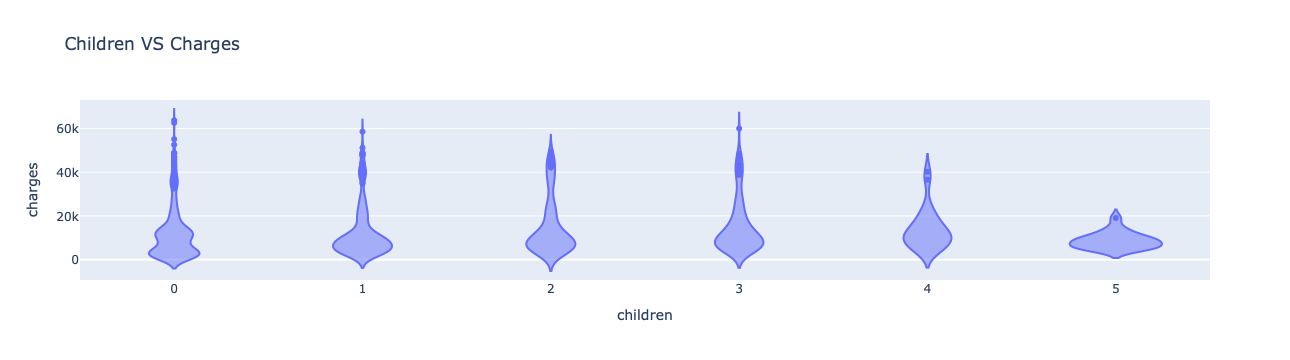

In [138]:
px.violin(df, x= 'children', y= 'charges', title= 'Children VS Charges')

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [142]:
df.charges.corr(df.age)

0.2990081933306478

In [152]:
df.charges.corr(df.children)

0.06799822684790487

In [154]:
smoker_values = {'yes': 1, 'no': 0}
smoker_num = df.smoker.map(smoker_values)
df.charges.corr(smoker_num)

0.7872514304984778

In [170]:
relation= df.corr(numeric_only=True)
relation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


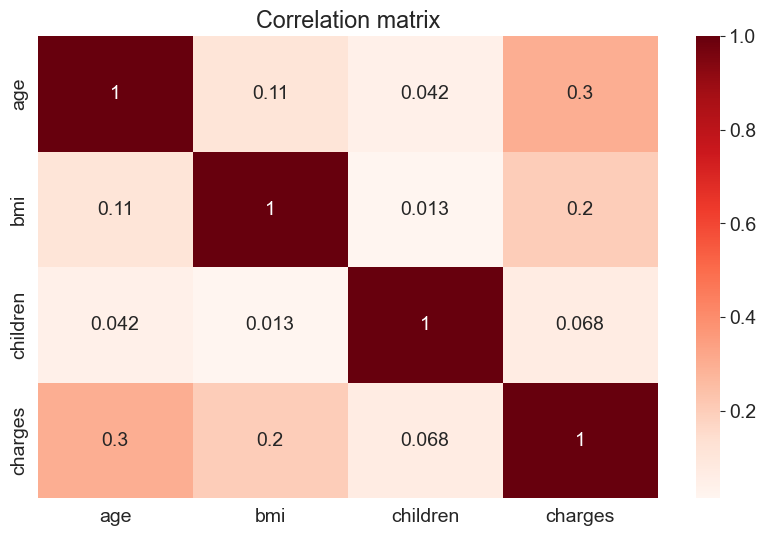

In [178]:
sns.heatmap(relation, cmap= 'Reds', annot= True)
plt.title('Correlation matrix')
plt.show()

In [212]:
non_smoker_df = df[df.smoker == 'no']

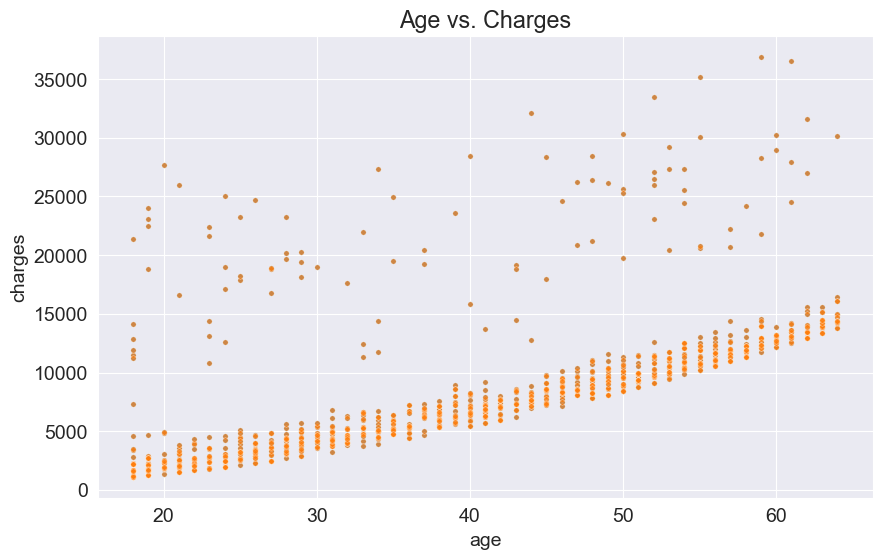

In [216]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);
plt.show()

In [219]:
import sklearn

In [227]:
from sklearn.linear_model import LinearRegression

In [232]:
from sklearn.pipeline import Pipeline

In [245]:
pipe =  Pipeline([
    ('model', LinearRegression())
])
pipe.get_params()

{'memory': None,
 'steps': [('model', LinearRegression())],
 'verbose': False,
 'model': LinearRegression(),
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__positive': False}

In [249]:
from sklearn.model_selection import GridSearchCV

In [265]:
mod = GridSearchCV(estimator = pipe,
                  param_grid = {},
                  cv= 3,
                  scoring = 'neg_root_mean_squared_error')

In [267]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
mod.fit(inputs, targets)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid={}, scoring='neg_root_mean_squared_error')

In [270]:
predictions = mod.predict(inputs)

In [274]:
print(predictions)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [276]:
print(mod.best_score_)

-4663.5536466052
